# Avocado Project

## Problem Statement:
Avocado is a fruit consumed by people heavily in the United States. 

Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold


Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

Do both tasks in the same .ipynb file and submit at single file. 

To download the dataset, use the link given below. 

# Problem description:

### The goal is to predict the average price which is continuous in nature of the different type of avocado and using the region that in which region they are lying.

# Fields/Columns:

- Date — The date of the observation
-  Average Price — the average price of a single avocado
-  type — conventional or organic
-  year — the year
-  Region — the city or region of the observation
-  Total Volume — Total number of avocados sold
-  4046 — Total number of avocados with PLU 4046 sold
-  4225 — Total number of avocados with PLU 4225 sold
-  4770 — Total number of avocados with PLU 4770 sold

# Importing Libraries

In [85]:
#For numerical computation
import numpy as np
#For data Manipulation
import pandas as pd
import scipy
import sklearn
import seaborn as sns
#Used for data visualisation purpose.
import matplotlib.pyplot as plt
import warnings
from pylab import rcParams  # for plotting box plot, to check outliers
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler  # for scaling

In [86]:
# For handling outliers
# importing required libraries
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore

In [91]:
# For machine learning and finding 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LogisticRegression,Lasso,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.decomposition import PCA
from scipy.stats import zscore


# Data Analysis Phase

## 1.Reading data frame

In [4]:
df = pd.read_csv("avocado.csv")

In [5]:
df.shape

(18249, 14)

### In our dataset total  18249 rows and 14 Columns

In [6]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [7]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [8]:
df.sample(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11978,45,2016-02-14,1.81,1247.80,50.84,263.65,0.00,933.31,933.31,0.00,0.00,organic,2016,Albany
571,51,2015-01-04,0.89,158638.04,80298.77,51860.47,7609.24,18869.56,16518.15,2132.21,219.20,conventional,2015,Columbus
14798,4,2017-12-03,1.62,10609.29,380.90,3883.18,0.00,6345.21,5731.00,614.21,0.00,organic,2017,Atlanta
7398,33,2017-05-14,0.69,1297119.20,612625.19,239024.86,14939.98,430529.17,275375.52,154056.43,1097.22,conventional,2017,PhoenixTucson
9665,19,2015-08-16,2.08,3554.43,378.55,2654.29,0.00,521.59,236.67,284.92,0.00,organic,2015,Columbus
7700,17,2017-09-03,1.45,115506.15,27598.89,37446.95,91.48,50368.83,43969.06,5061.79,1337.98,conventional,2017,Roanoke
3490,6,2016-11-13,1.39,236523.09,78974.40,43868.31,5687.17,107993.21,107105.62,873.33,14.26,conventional,2016,Detroit
8994,0,2018-03-25,1.40,524265.69,103573.88,149867.07,998.53,269826.21,155866.80,113666.70,292.71,conventional,2018,Seattle
17464,20,2017-08-13,1.88,1014709.07,98007.24,230106.14,1414.21,684998.04,612544.62,72449.02,4.40,organic,2017,TotalUS
12143,2,2016-12-11,1.88,13714.62,22.64,1093.69,0.00,12598.29,12593.46,4.83,0.00,organic,2016,Boston


In [9]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

## Observation
- As we drop the  Unnamed: 0 column beacuse it has no effect on our dataset

In [10]:
df.drop('Unnamed: 0',inplace = True ,axis = 1)

In [11]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


## Observation:
- After dropping the coulm now we can check shape and column of the data

In [12]:
df.shape

(18249, 13)

In [13]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [14]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [15]:
df.tail()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [16]:
df.sample()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
14416,2016-03-27,1.45,2927.32,59.51,1996.63,1.92,869.26,0.0,869.26,0.0,organic,2016,Spokane


## Checking the datatype of every feature

In [17]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

# Observation:
As per problem statement our independent feature is float value so its a
- regression Problems for finding sale price prediction
- Classification problem for region defining

## Checking five number summery of data

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65
year,18249.0,2016.147899,9.399385e-01,2015.00,2015.00,2016.00,2017.00,2018.00


## Observation:
- AveragePrice:Tha avergae price of the avacodo is 1.40.There are 75% people can afford the fruit with 1.66 and remaining between 25% and 50% with 1.10 and 1.,maximum is 1.68
-  Total Volume :The avacodo fruit is sold at max qty which is around62505646.52 and min is 84.56
-  4046 - The Avergae price is 293008.424531	
-  4225 - The Avergae pricee is 295154.568356
-  4770 -  The Avergae pricee is 22839.735993
-  Total Bags - 
-  Small Bags -
-  Large Bags - 
-  XLarge Bags - 75% people can afford with a rate of 132.50.
-  year

In [19]:
df['Total Bags'].unique()

array([ 8696.87,  9505.56,  8145.35, ...,  9394.11, 10969.54, 12014.15])

- To check the number of null values in the dataset columns

In [20]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

## Observation
- There is no such row which has missing values 
- Now our dataframe is nullfree


# Scatterplot

## Checking Categorical Variable

In [21]:
df.describe(include="O")

,Date,type,region
count,18249,18249,18249
unique,169,2,54
top,2015-12-27,conventional,Albany
freq,108,9126,338


## Regarding Data
- There is 2 categories in "type" (Conventional & organic)
- There are 54 region with 1 unique conventional type


## Frequency with number of occurance
- There are 1517 type avacode are produced with conventional method
- There are 76 store  are located in california 


## 1.Checking Numerical Variable

In [22]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != "O"]

In [23]:
numerical_features

['AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'year']

### 1.1 Checking Data Distribution

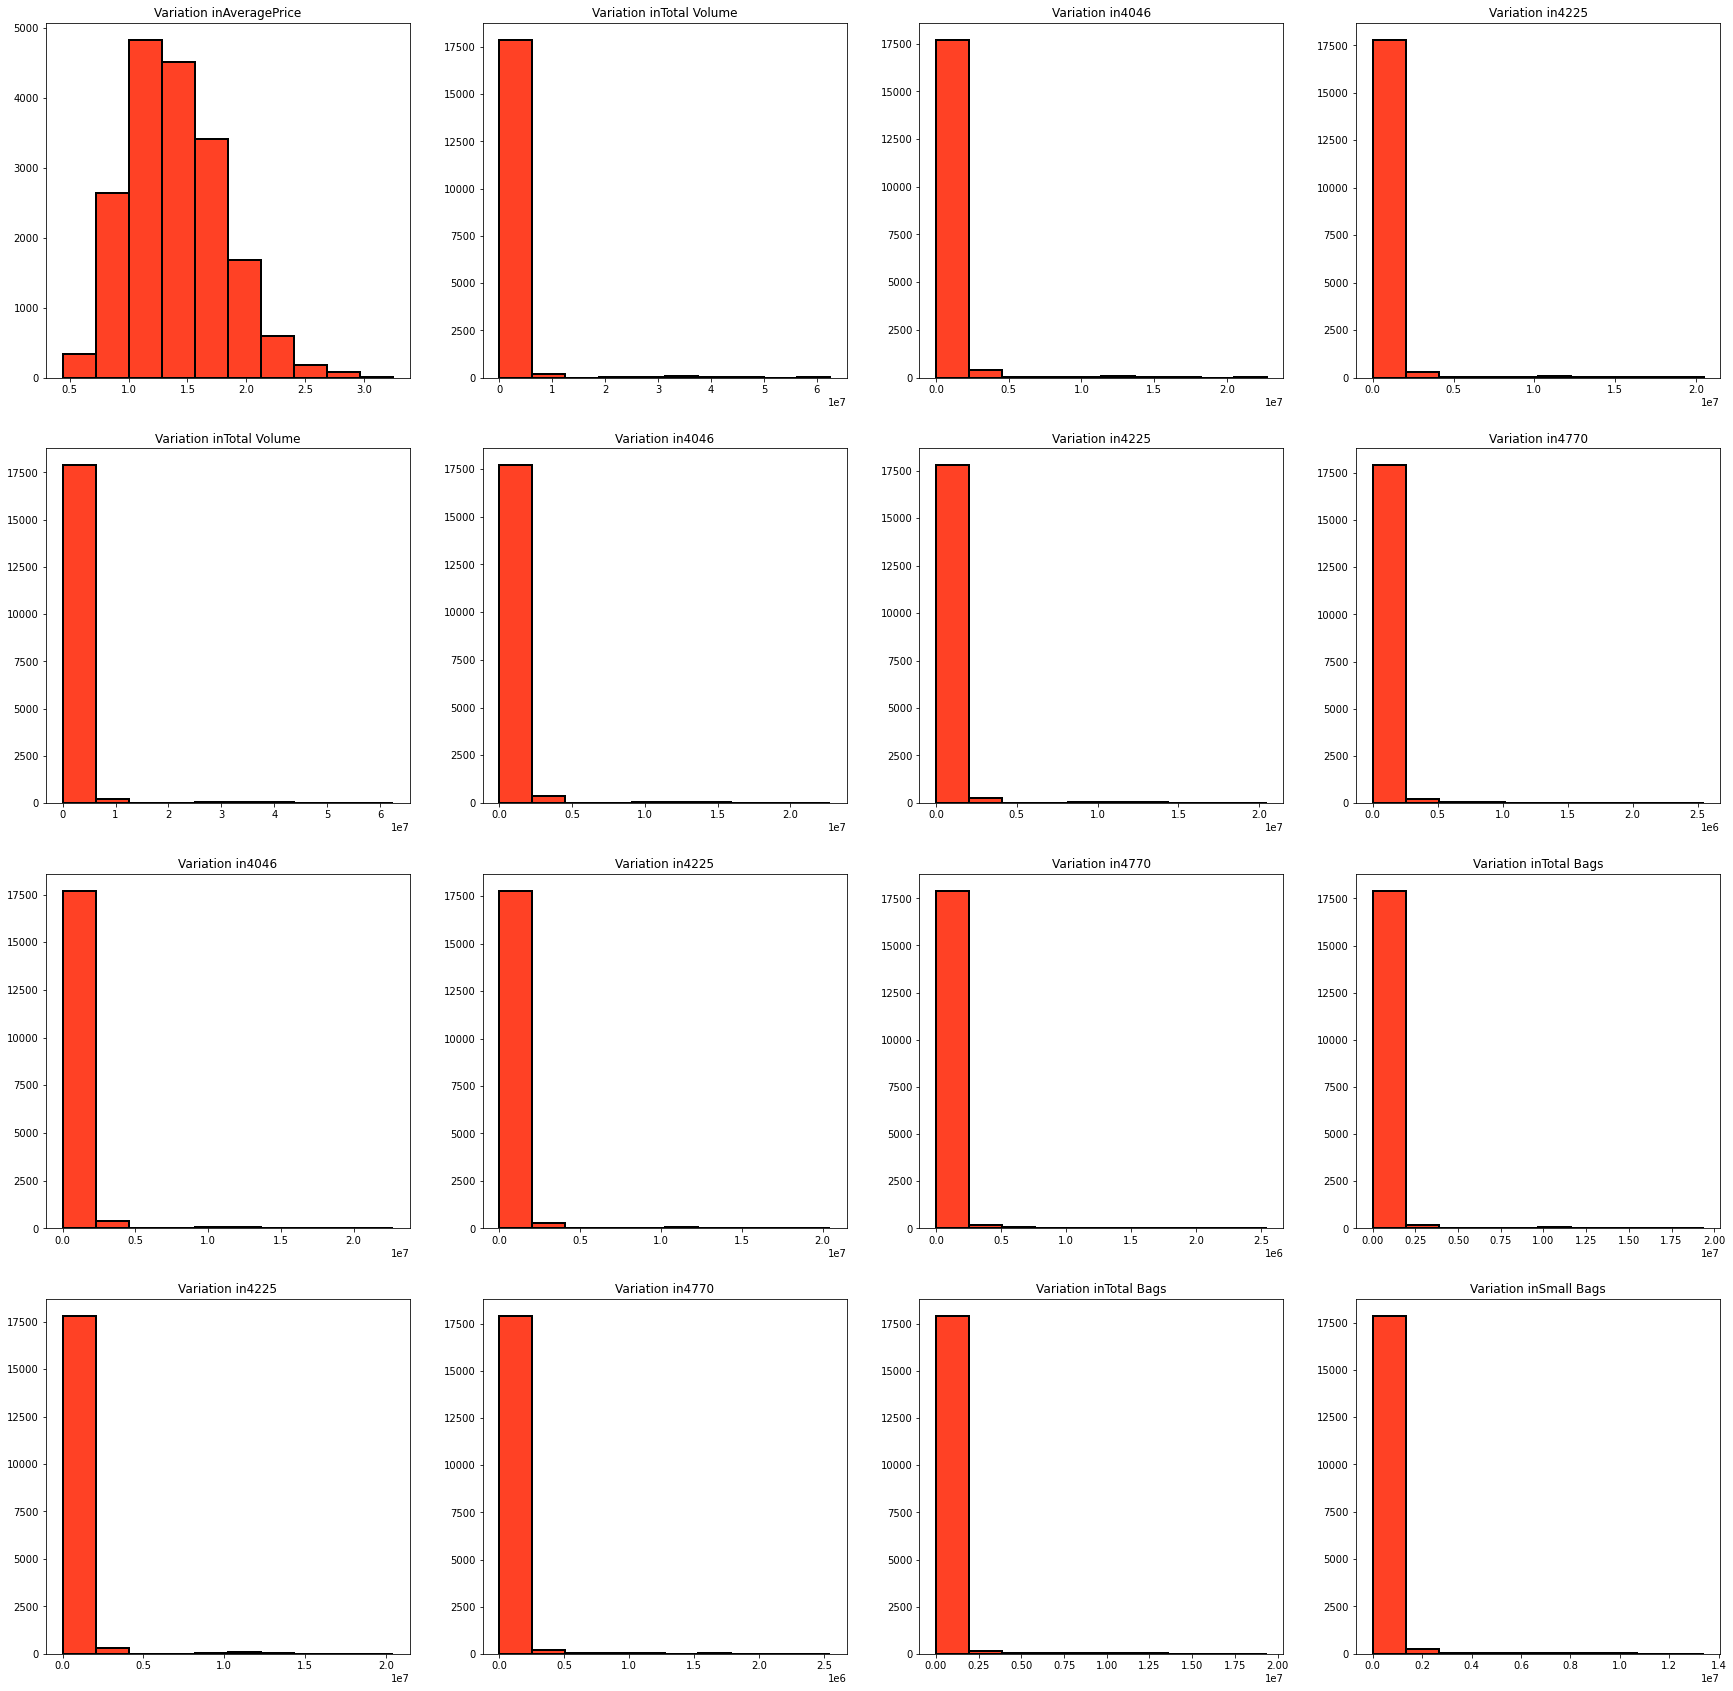

In [24]:
fig,axes=plt.subplots(4,4)
columns=['AveragePrice', 'Total Volume', '4046', '4225',"4770", 'Total Bags',
       'Small Bags', 'Large Bags',"XLarge Bags","year"]
for i in range (4):
    for j in range (4):
        axes[i,j].hist(x=columns[i+j],data=df,edgecolor='#000000',linewidth=2,color='#ff4125')
        axes[i,j].set_title('Variation in'+columns[i+j])
fig=plt.gcf()
fig.set_size_inches(30,30)
# fig.tight_layout()

### 1.2 Univariate Analysis

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

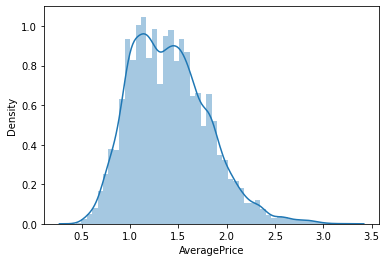

In [25]:
sns.distplot(df["AveragePrice"])

<AxesSubplot:xlabel='Total Volume', ylabel='Density'>

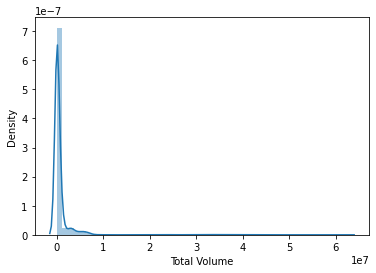

In [26]:
sns.distplot(df['Total Volume'])

<AxesSubplot:xlabel='4046', ylabel='Density'>

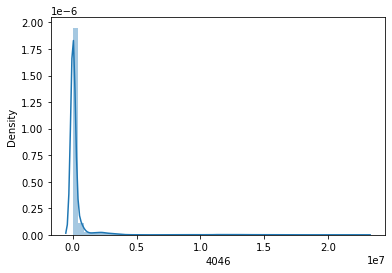

In [27]:
sns.distplot(df["4046"])


<AxesSubplot:xlabel='4225', ylabel='Density'>

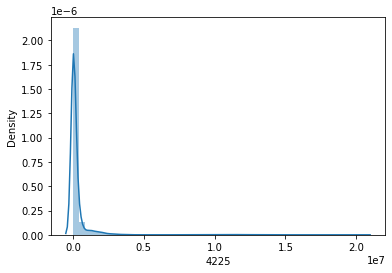

In [28]:
sns.distplot(df["4225"])

<AxesSubplot:xlabel='4770', ylabel='Density'>

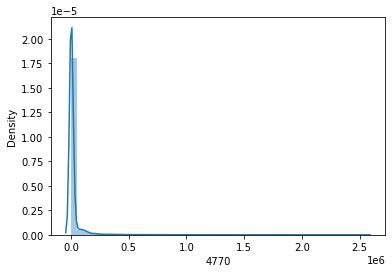

In [29]:
sns.distplot(df["4770"])

<AxesSubplot:xlabel='Total Bags', ylabel='Density'>

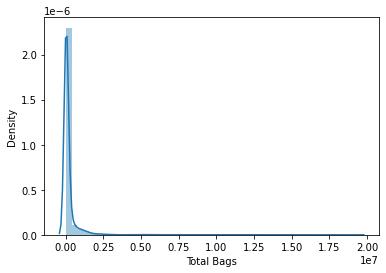

In [30]:
sns.distplot(df["Total Bags"])

<AxesSubplot:xlabel='Small Bags', ylabel='Density'>

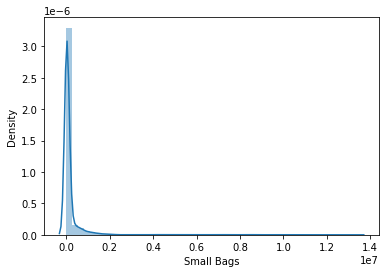

In [31]:
sns.distplot(df["Small Bags"])

<AxesSubplot:xlabel='Large Bags', ylabel='Density'>

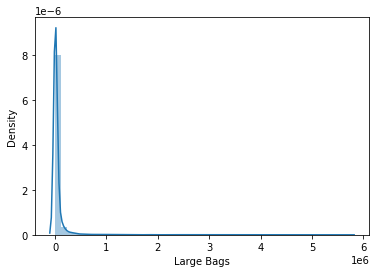

In [32]:
sns.distplot(df["Large Bags"])

<AxesSubplot:xlabel='XLarge Bags', ylabel='Density'>

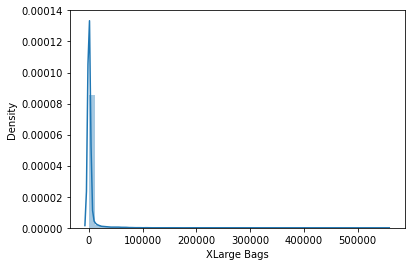

In [33]:
sns.distplot(df["XLarge Bags"])

<AxesSubplot:xlabel='year', ylabel='Density'>

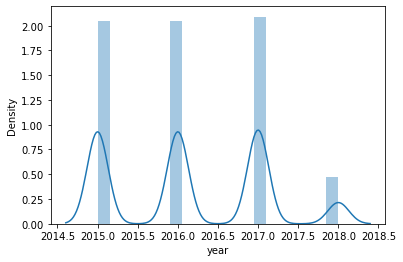

In [34]:
sns.distplot(df["year"])

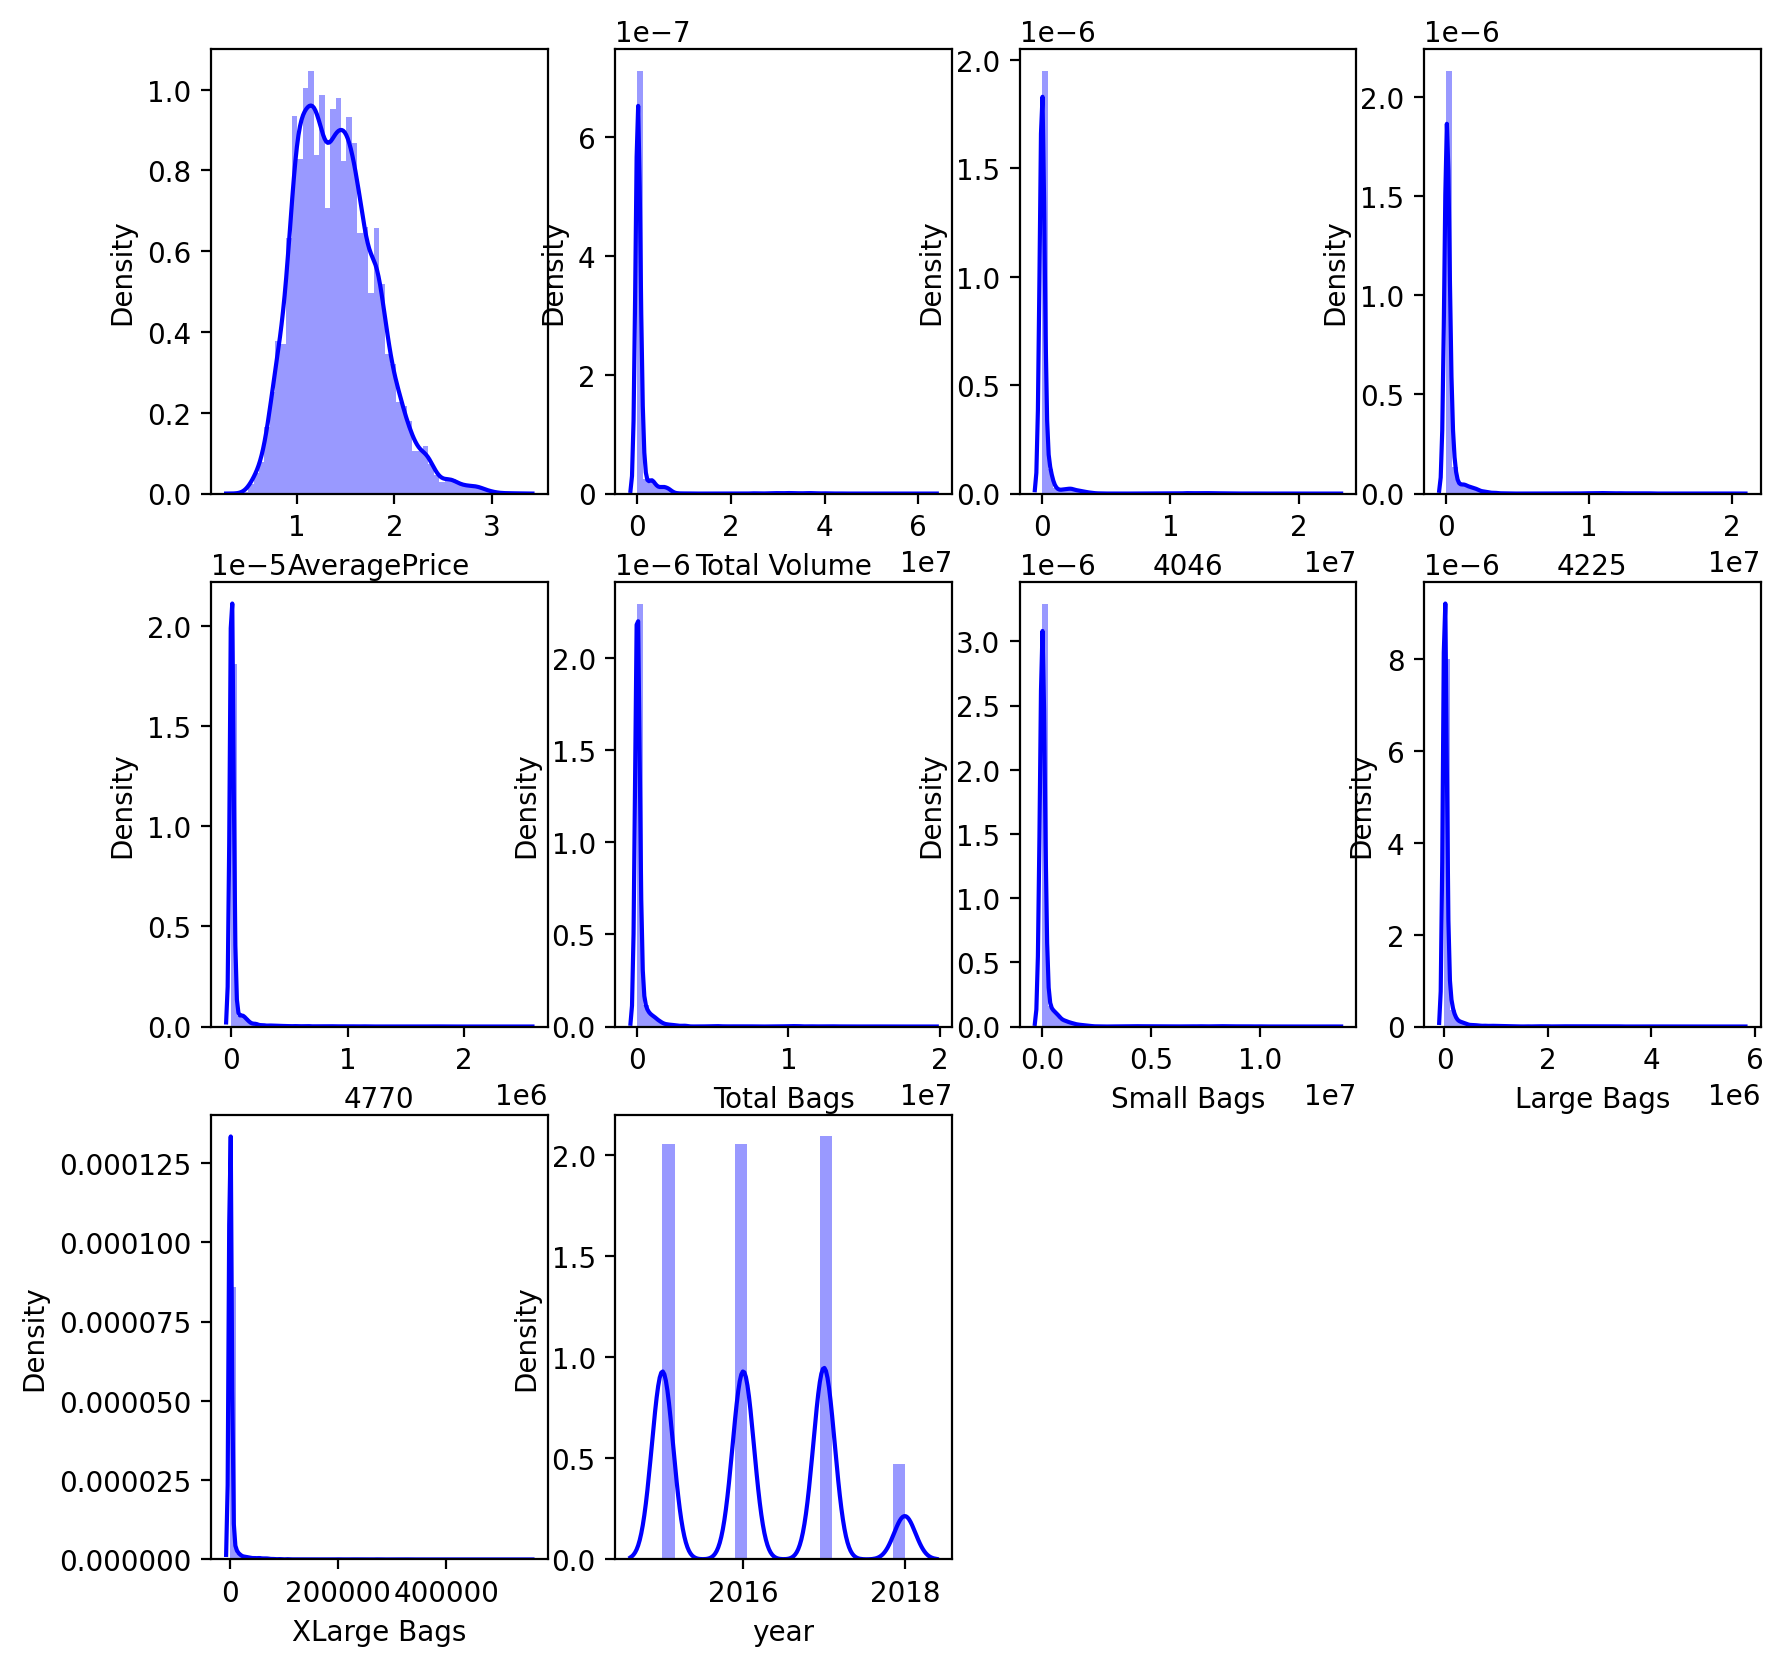

In [35]:
plt.figure(figsize=(10,10),dpi=200)
for i in enumerate(numerical_features):
    plt.subplot(3,4,i[0]+1)
    sns.distplot(df[i[1]],color='b')


# Observation:
- Average price column is normally distributing over the distplot.
- Rest of the data are likely left skewed.So we need to removed the skewnes from te data
- All data need to transform into normal distribution, as skewness present in data

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

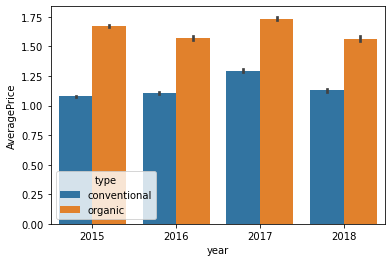

In [36]:
sns.barplot(x = 'year',y ='AveragePrice',hue='type',data = df )

## Observation
- If we see that maximum average price is in 2017 for both type conventional and organic

Text(0.5, 1.0, 'Average Price of Avocado According to Region')

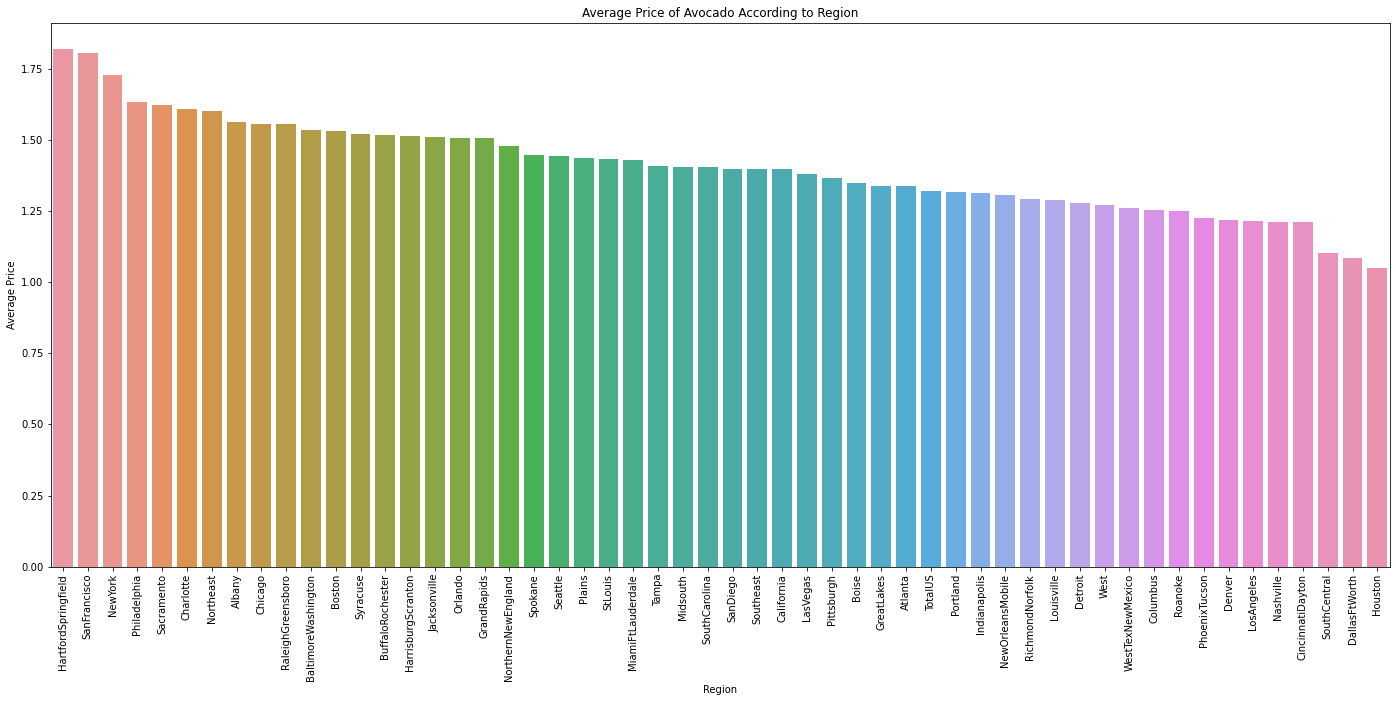

In [37]:
region_list=list(df.region.unique())
average_price=[]

for i in region_list:
    x=df[df.region==i]
    region_average=sum(x.AveragePrice)/len(x)
    average_price.append(region_average)

df2=pd.DataFrame({'region_list':region_list,'average_price':average_price})
new_index=df2.average_price.sort_values(ascending=False).index.values
sorted_data=df2.reindex(new_index)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=sorted_data.region_list,y=sorted_data.average_price)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

# Observation:
Below are the regions where price is high 
- HartfordSpringfield
- SanFrancisco
- NewYork
- Philadelphia
- Sacramento

Text(0.5, 1.0, 'Average of Total Volume According to Region')

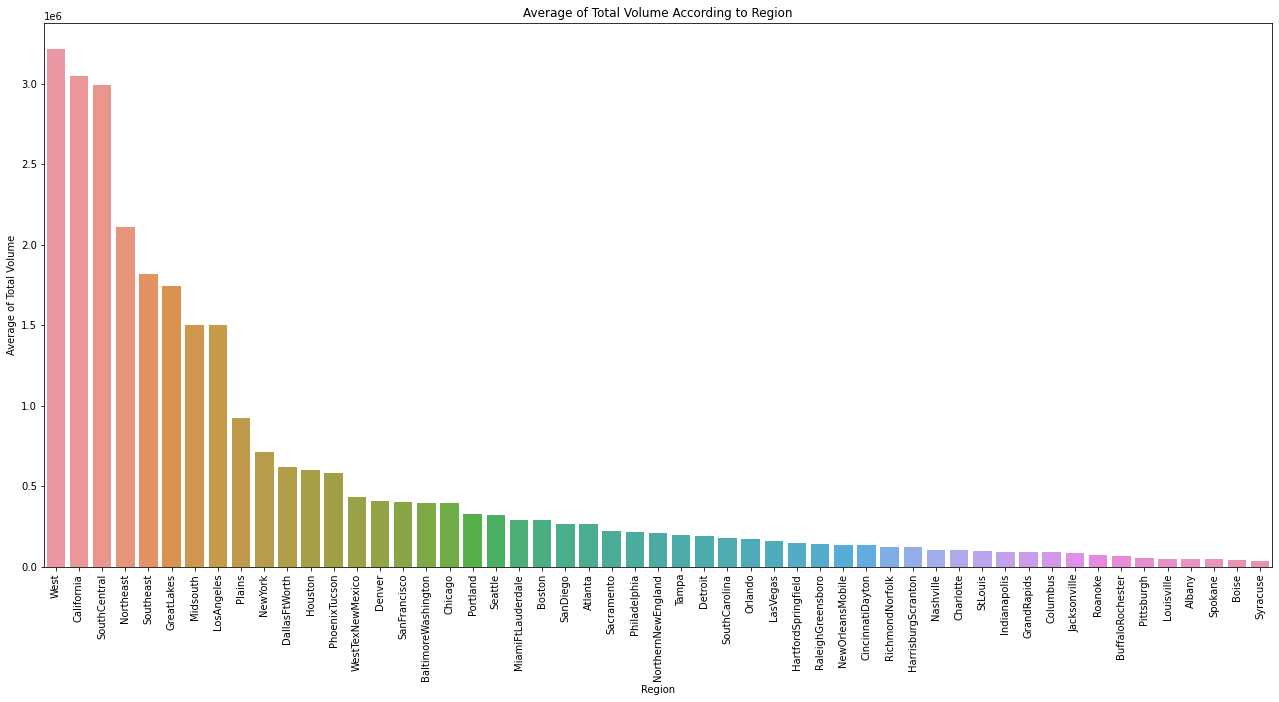

In [38]:
filter1=df.region!='TotalUS'
df1=df[filter1]

region_list=list(df1.region.unique())
average_total_volume=[]

for i in region_list:
    x=df1[df1.region==i]
    average_total_volume.append(sum(x['Total Volume'])/len(x))
df3=pd.DataFrame({'region_list':region_list,'average_total_volume':average_total_volume})

new_index=df3.average_total_volume.sort_values(ascending=False).index.values
sorted_data1=df3.reindex(new_index)

plt.figure(figsize=(22,10))
ax=sns.barplot(x=sorted_data1.region_list,y=sorted_data1.average_total_volume)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average of Total Volume')
plt.title('Average of Total Volume According to Region')

## Observation
These region are where Consumption is very high
- West
- California
- SouthCentral
- Northeast
- Southeast

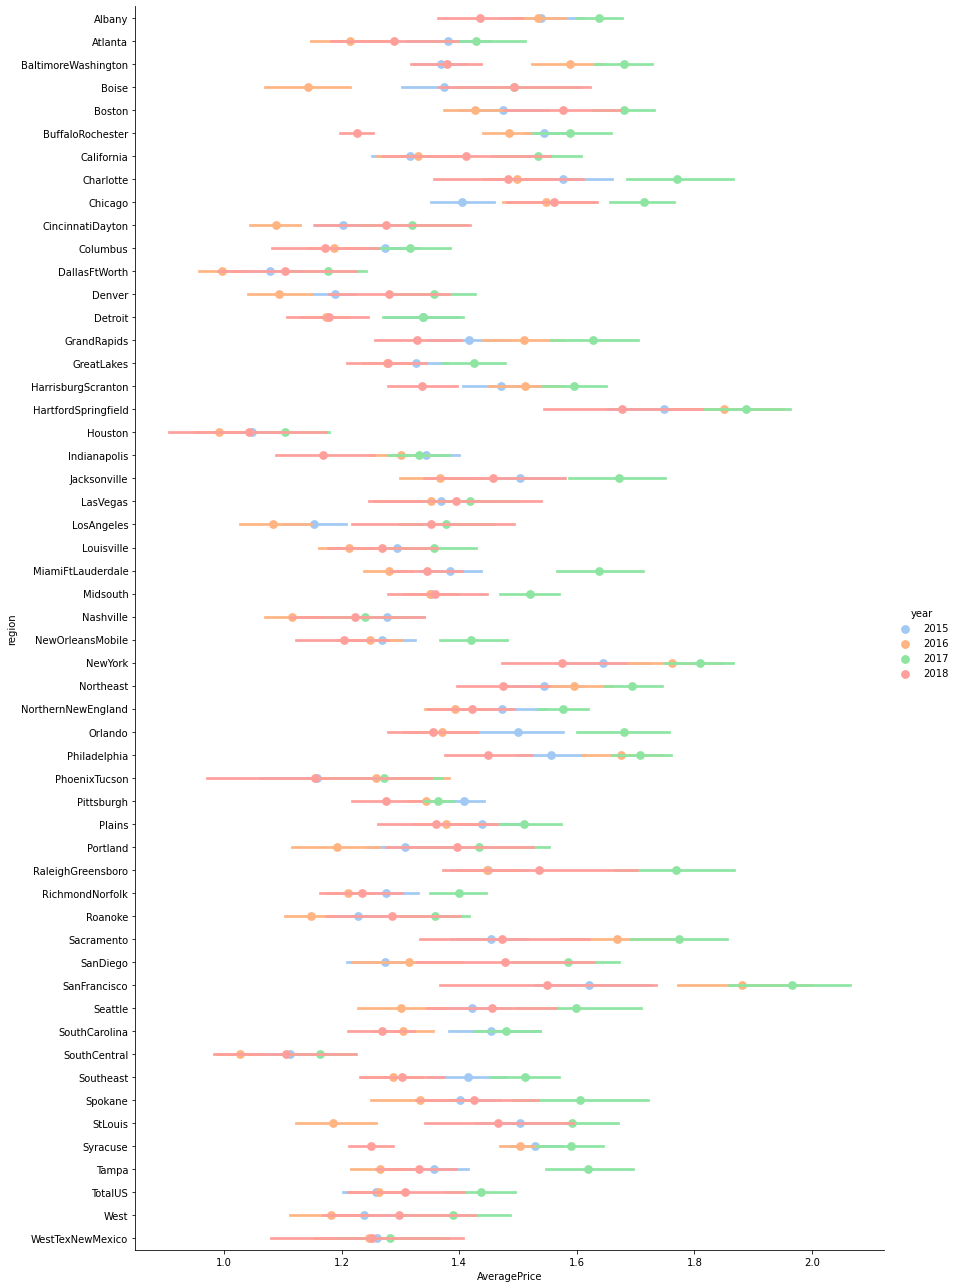

In [39]:
db = sns.factorplot('AveragePrice','region',data=df,
                   hue='year',
                   size=18,
                   aspect=0.7,
                   palette='pastel',
                   join=False,
              )

# Observation
- Looks like there was a huge increase in Avocado prices as the demand was little high in Year 2017 in SanFranciso region.

In [40]:
avocado_prophet_df = df[['Date', 'AveragePrice']] 
avocado_prophet_df

,Date,AveragePrice
0,2015-12-27,1.33
1,2015-12-20,1.35
2,2015-12-13,0.93
3,2015-12-06,1.08
4,2015-11-29,1.28
...,...,...
18244,2018-02-04,1.63
18245,2018-01-28,1.71
18246,2018-01-21,1.87
18247,2018-01-14,1.93


Text(0.5, 1.0, 'Average Price')

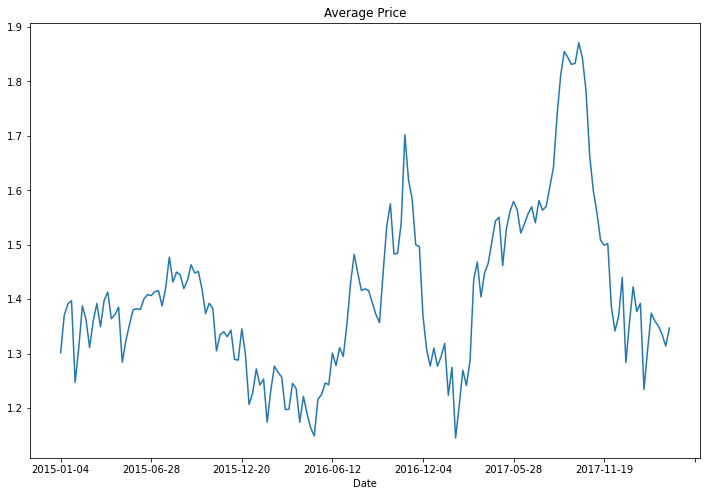

In [41]:
byDate=df.groupby('Date').mean()
plt.figure(figsize=(12,8))
byDate['AveragePrice'].plot()
plt.title('Average Price')

## Observation
- This also shows there was a huge hike in prices after July 2017 and before Jan 2018.

## Checking Outlier

AveragePrice       AxesSubplot(0.125,0.657941;0.168478x0.222059)
Total Volume    AxesSubplot(0.327174,0.657941;0.168478x0.222059)
4046            AxesSubplot(0.529348,0.657941;0.168478x0.222059)
4225            AxesSubplot(0.731522,0.657941;0.168478x0.222059)
4770               AxesSubplot(0.125,0.391471;0.168478x0.222059)
Total Bags      AxesSubplot(0.327174,0.391471;0.168478x0.222059)
Small Bags      AxesSubplot(0.529348,0.391471;0.168478x0.222059)
Large Bags      AxesSubplot(0.731522,0.391471;0.168478x0.222059)
XLarge Bags           AxesSubplot(0.125,0.125;0.168478x0.222059)
year               AxesSubplot(0.327174,0.125;0.168478x0.222059)
dtype: object

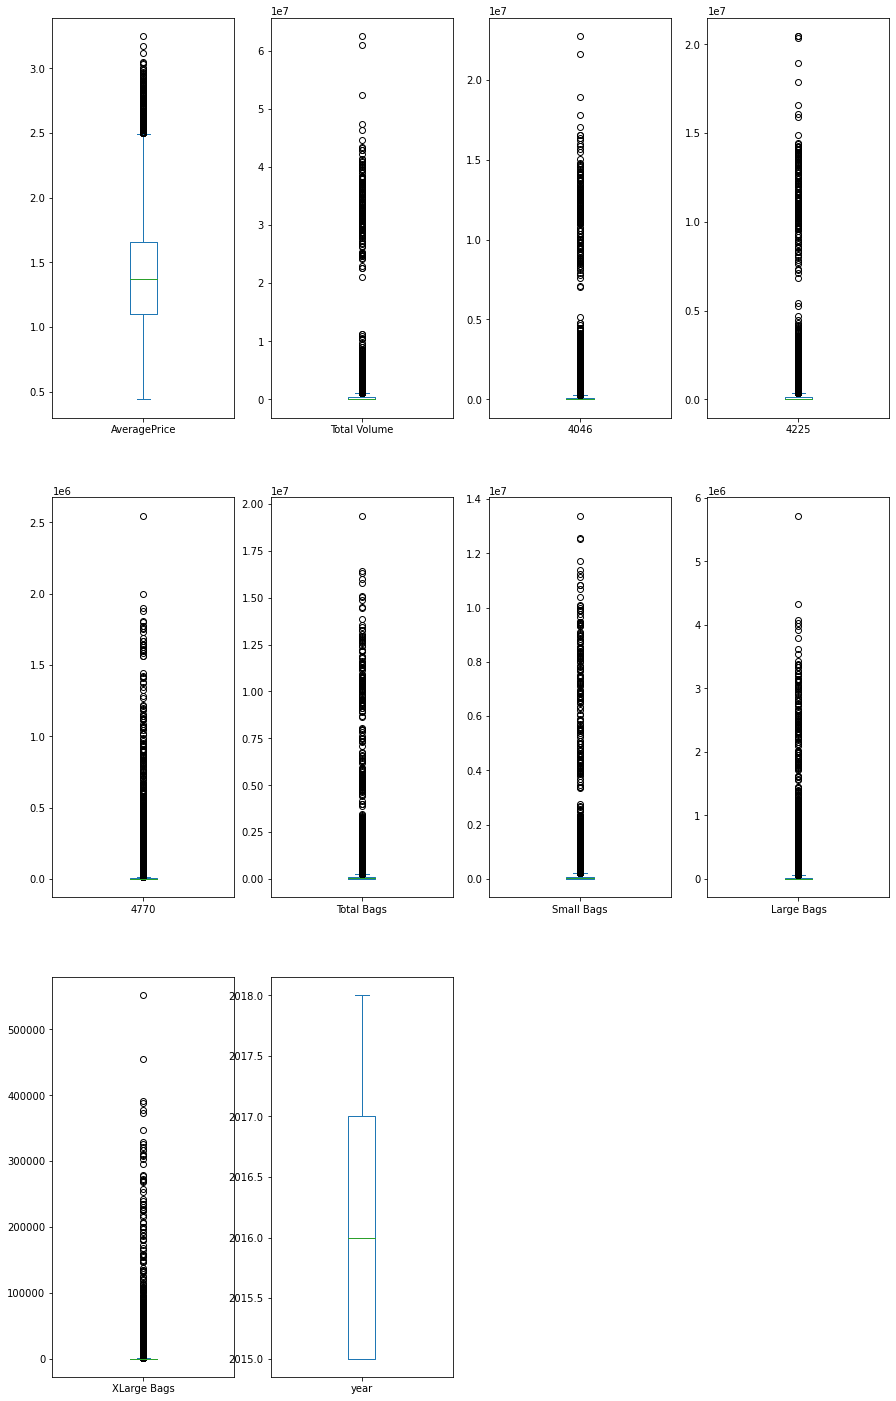

In [42]:
df.plot(kind='box',subplots=True,layout=(3,4),figsize=(15,25))

## Observation
- From above image we can clear see that there are number of black dots in most of the column which are referring to the outliers, so it means most of the data are outside the distribution.
- So we need to removed outlier by using z score or iqr method

In [43]:
le = LabelEncoder()
df['region'] = le.fit_transform(df['region'])
df['type'] = le.fit_transform(df['type'])
df['Date'] = le.fit_transform(df['Date'])


In [44]:
df.region.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53])

In [45]:
#calculate the zscore
z = np.abs(zscore(df))
print(z)

           Date  AveragePrice  Total Volume      4046      4225      4770  \
0      0.676360      0.188689      0.227716  0.230816  0.199902  0.212091   
1      0.696857      0.139020      0.230427  0.231103  0.208054  0.211997   
2      0.717355      1.182069      0.212085  0.231007  0.154478  0.211325   
3      0.737853      0.809551      0.223444  0.230741  0.185350  0.211864   
4      0.758350      0.312861      0.231538  0.230891  0.208719  0.211834   
...         ...           ...           ...       ...       ...       ...   
18244  1.578371      0.556347      0.241373  0.230017  0.243857  0.212540   
18245  1.557874      0.755023      0.242296  0.230693  0.242277  0.212540   
18246  1.537376      1.152375      0.242331  0.230693  0.243090  0.205766   
18247  1.516879      1.301382      0.241625  0.230428  0.242651  0.205774   
18248  1.496381      0.531512      0.241253  0.229347  0.243170  0.210450   

       Total Bags  Small Bags  Large Bags  XLarge Bags      type      year 

## Skewness Checking

In [56]:
df.skew()

Date            0.000117
AveragePrice    0.126385
Total Volume    0.088098
4046           -0.328195
4225            1.219271
4770            1.212184
Total Bags     -0.140589
Small Bags     -0.354860
Large Bags     -0.547765
XLarge Bags     1.174147
type            0.000329
year            0.214695
region          0.000030
4225           -0.414983
4770            0.099986
dtype: float64

In [57]:
df['AveragePrice'] = np.log(1+df['AveragePrice'])
df['Total Volume'] = np.log(1+df['Total Volume'])
df['4046'] = np.log(1+df['4046'])
df['4225 '] = np.log(1+df['4225'])
df['4770 '] = np.log(1+df['4770'])
df['Total Bags'] = np.log(1+df['Total Bags'])
df['Small Bags'] = np.log(1+df['Small Bags'])
df['Large Bags'] = np.log(1+df['Large Bags'])
df['XLarge Bags'] = np.log(1+df['XLarge Bags'])
df['year'] = np.log(1+df['year'])

In [58]:
features = [feature for feature in df.columns if df[feature].dtype != 'O']

In [59]:
dic = {}
for feature in features:
    IQR = df[feature].quantile(0.75) - df[feature].quantile(0.25)
    upper_bond = df[feature].quantile(0.75) + (IQR * 1.5)
    lower_bond = df[feature].quantile(0.25) - (IQR * 1.5)
    
    df[feature] = np.where(df[feature]>upper_bond,upper_bond,df[feature])
    df[feature] = np.where(df[feature]<lower_bond,lower_bond,df[feature])

Date                AxesSubplot(0.125,0.71587;0.168478x0.16413)
AveragePrice     AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Total Volume     AxesSubplot(0.529348,0.71587;0.168478x0.16413)
4046             AxesSubplot(0.731522,0.71587;0.168478x0.16413)
4225               AxesSubplot(0.125,0.518913;0.168478x0.16413)
4770            AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Total Bags      AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Small Bags      AxesSubplot(0.731522,0.518913;0.168478x0.16413)
Large Bags         AxesSubplot(0.125,0.321957;0.168478x0.16413)
XLarge Bags     AxesSubplot(0.327174,0.321957;0.168478x0.16413)
type            AxesSubplot(0.529348,0.321957;0.168478x0.16413)
year            AxesSubplot(0.731522,0.321957;0.168478x0.16413)
region                AxesSubplot(0.125,0.125;0.168478x0.16413)
4225               AxesSubplot(0.327174,0.125;0.168478x0.16413)
4770               AxesSubplot(0.529348,0.125;0.168478x0.16413)
dtype: object

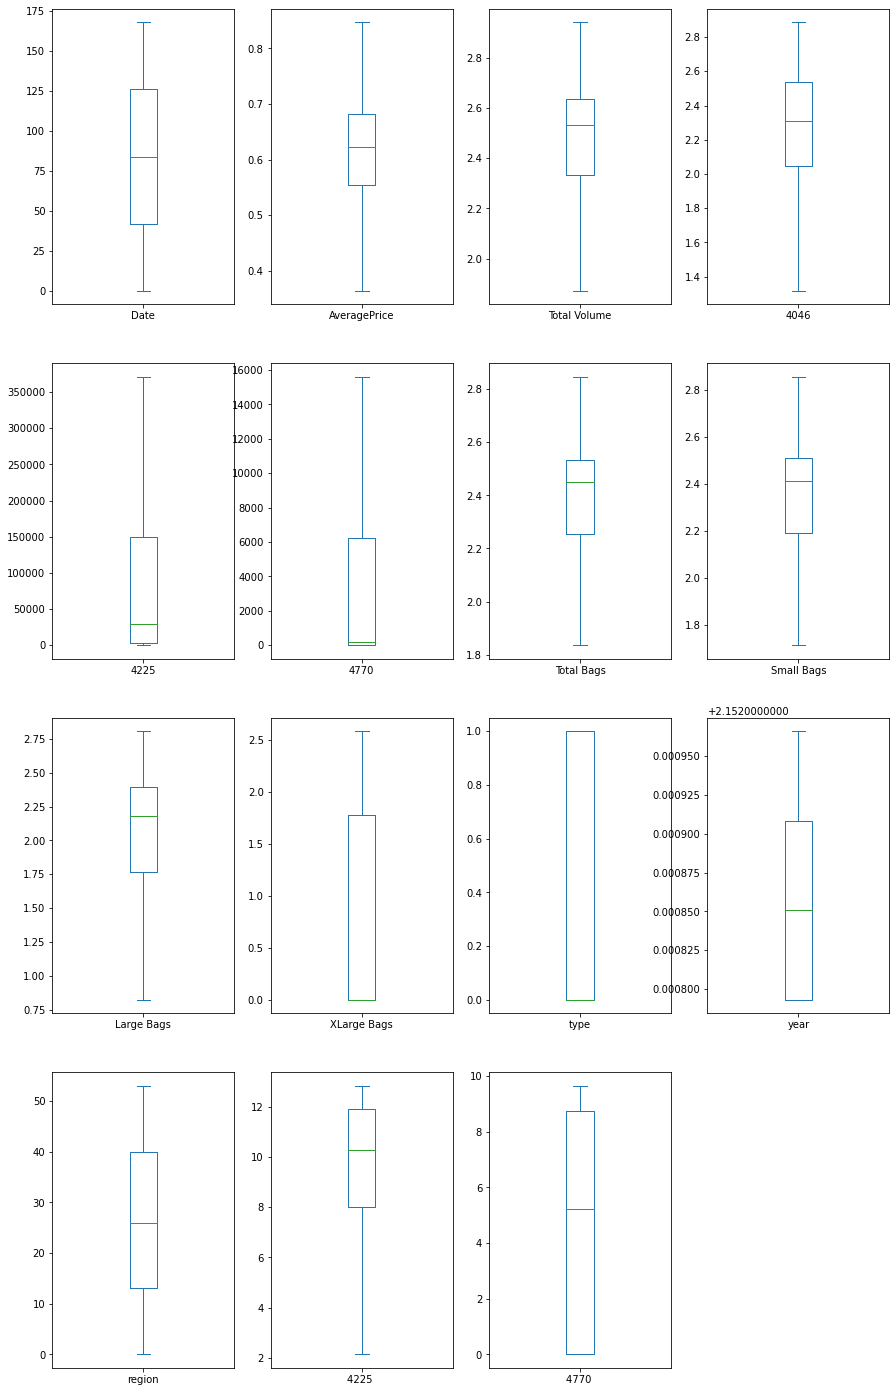

In [60]:
df.plot(kind='box',subplots=True,layout=(4,4),figsize=(15,25))

In [61]:
df.skew()

Date            0.000117
AveragePrice   -0.088080
Total Volume   -0.240762
4046           -0.852325
4225            1.219271
4770            1.212184
Total Bags     -0.549332
Small Bags     -0.721808
Large Bags     -1.039376
XLarge Bags     0.840323
type            0.000329
year            0.214621
region          0.000030
4225           -0.733301
4770           -0.101183
dtype: float64

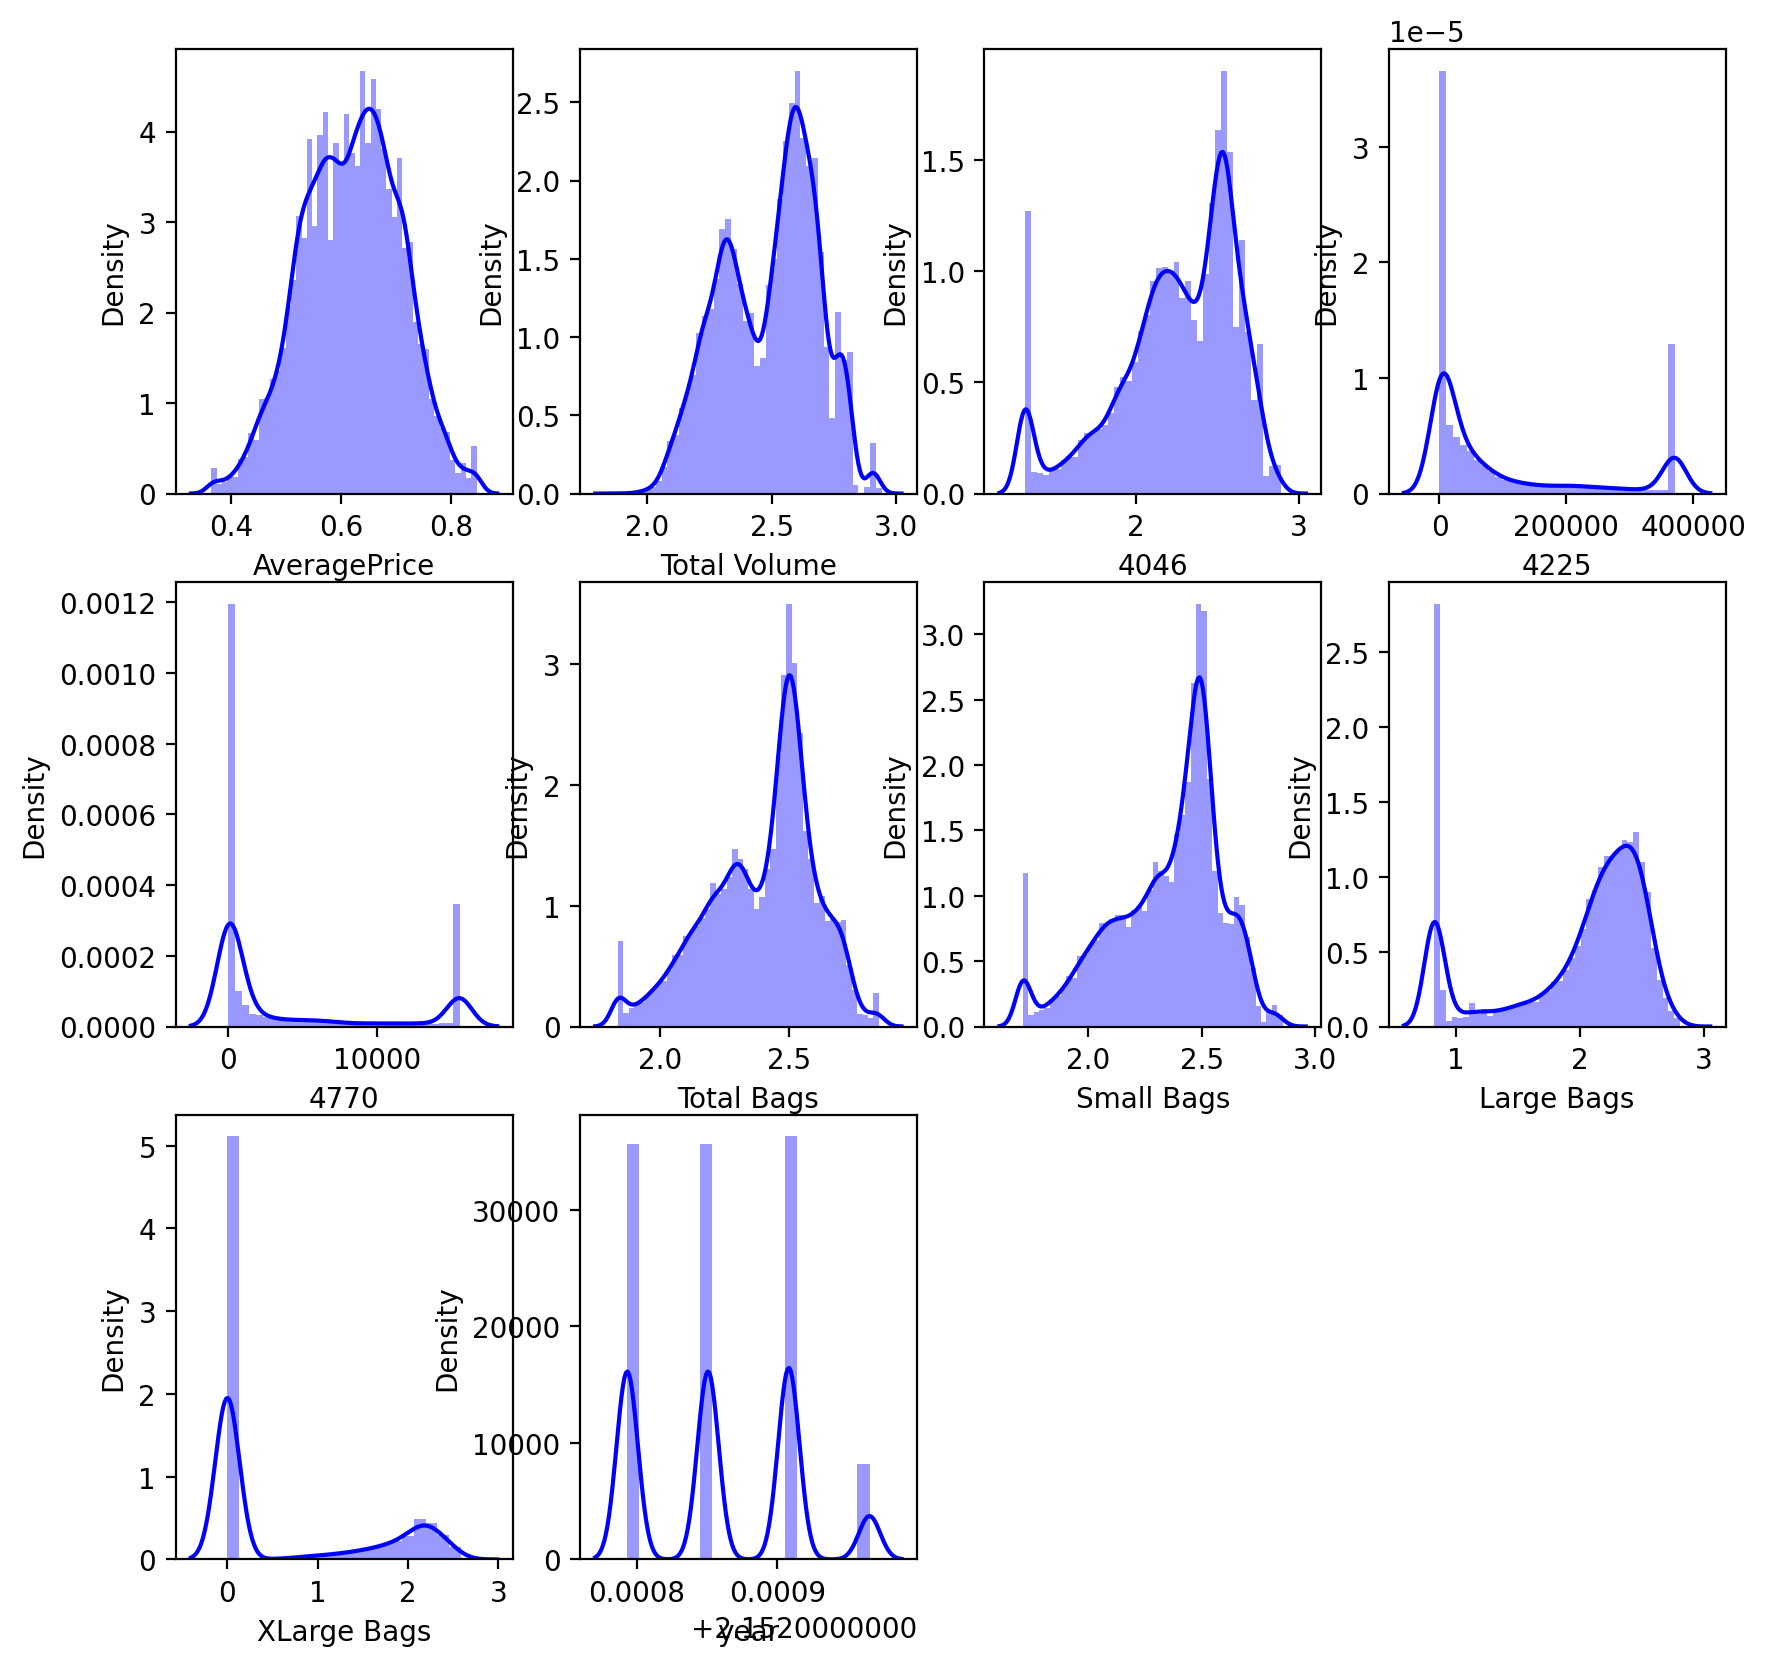

In [62]:
plt.figure(figsize=(10,10),dpi=200)
for i in enumerate(numerical_features):
    plt.subplot(3,4,i[0]+1)
    sns.distplot(df[i[1]],color='b')

# Observation:
Looking at the above distribution plots we can see that there is skewness due to the outliers which we saw in the boxplot. Still there are many that are showing a bell shape curve indicating a normal distribution.

## Variance Inflation Factor

In [67]:
df2=pd.DataFrame(data=df)       # copying the dataframe
df2

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,4225,4770
0,51.0,0.612950,2.490752,2.072518,54454.85,48.16,2.309643,2.308573,1.713068,0.0,0.0,2.152793,0.0,10.905146,3.895080
1,50.0,0.617569,2.477619,2.016918,44638.81,58.33,2.318433,2.317417,1.720971,0.0,0.0,2.152793,0.0,10.706381,4.083115
2,49.0,0.505323,2.540051,2.038518,109149.67,130.50,2.303117,2.301843,1.730901,0.0,0.0,2.152793,0.0,11.600485,4.879007
3,48.0,0.549489,2.507737,2.083511,71976.41,72.58,2.268791,2.266380,1.775545,0.0,0.0,2.152793,0.0,11.184108,4.298373
4,47.0,0.601128,2.471515,2.060324,43838.39,75.78,2.275201,2.271857,1.839239,0.0,0.0,2.152793,0.0,10.688288,4.340944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,161.0,0.676501,2.374480,2.154619,1529.20,0.00,2.352367,2.349269,1.955916,0.0,1.0,2.152966,53.0,7.333154,0.000000
18245,160.0,0.691620,2.355069,2.089884,3431.50,0.00,2.315905,2.312378,1.914903,0.0,1.0,2.152966,53.0,8.141044,0.000000
18246,159.0,0.719941,2.354236,2.089907,2452.79,727.94,2.317271,2.316826,1.562007,0.0,1.0,2.152966,53.0,7.805389,6.591591
18247,158.0,0.729962,2.369603,2.120119,2981.04,727.01,2.332432,2.331989,1.595709,0.0,1.0,2.152966,53.0,8.000363,6.590315


In [68]:
x1=df2.iloc[:,:-2]  # Dropping last column from data frame
y1=df2.iloc[:,1]

In [69]:
x1

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,51.0,0.612950,2.490752,2.072518,54454.85,48.16,2.309643,2.308573,1.713068,0.0,0.0,2.152793,0.0
1,50.0,0.617569,2.477619,2.016918,44638.81,58.33,2.318433,2.317417,1.720971,0.0,0.0,2.152793,0.0
2,49.0,0.505323,2.540051,2.038518,109149.67,130.50,2.303117,2.301843,1.730901,0.0,0.0,2.152793,0.0
3,48.0,0.549489,2.507737,2.083511,71976.41,72.58,2.268791,2.266380,1.775545,0.0,0.0,2.152793,0.0
4,47.0,0.601128,2.471515,2.060324,43838.39,75.78,2.275201,2.271857,1.839239,0.0,0.0,2.152793,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,161.0,0.676501,2.374480,2.154619,1529.20,0.00,2.352367,2.349269,1.955916,0.0,1.0,2.152966,53.0
18245,160.0,0.691620,2.355069,2.089884,3431.50,0.00,2.315905,2.312378,1.914903,0.0,1.0,2.152966,53.0
18246,159.0,0.719941,2.354236,2.089907,2452.79,727.94,2.317271,2.316826,1.562007,0.0,1.0,2.152966,53.0
18247,158.0,0.729962,2.369603,2.120119,2981.04,727.01,2.332432,2.331989,1.595709,0.0,1.0,2.152966,53.0


In [70]:
y1

0        0.612950
1        0.617569
2        0.505323
3        0.549489
4        0.601128
           ...   
18244    0.676501
18245    0.691620
18246    0.719941
18247    0.729962
18248    0.674563
Name: AveragePrice, Length: 18249, dtype: float64

In [71]:
x1.shape

(18249, 13)

In [72]:
def calc_vif(x1):
    vif=pd.DataFrame()
    vif["variables"]=x1.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])]
    return(vif)

In [73]:
calc_vif(x1)

,variables,VIF FACTOR
0,Date,5.798277
1,AveragePrice,104.117523
2,Total Volume,3544.752423
3,4046,180.533191
4,4225,5.342914
5,4770,3.594458
6,Total Bags,2888.886784
7,Small Bags,1007.645486
8,Large Bags,29.816616
9,XLarge Bags,3.366588


## Checking The correletion


<AxesSubplot:>

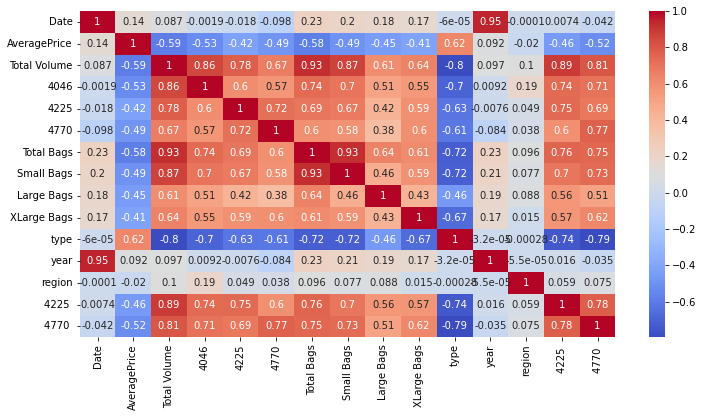

In [74]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

In [75]:
df.corr()["AveragePrice"].sort_values()

Total Volume   -0.592492
Total Bags     -0.580305
4046           -0.527409
4770           -0.518166
Small Bags     -0.492652
4770           -0.487395
4225           -0.459866
Large Bags     -0.450147
4225           -0.422139
XLarge Bags    -0.411467
region         -0.019623
year            0.091520
Date            0.144552
type            0.621017
AveragePrice    1.000000
Name: AveragePrice, dtype: float64

- As we can from the heatmap above, all the Features are not correleted with the Average Price column, instead most of them are correlated with each other.

- First we have to do some Feature Engineering on the categorical Features : region and type

# Scaling the independant variable (x) to get all the columns in a standard scale

In [92]:
sc=StandardScaler()
x1=sc.fit_transform(x)
x1

array([[-0.01241679, -0.47379468, -0.33244626, ..., -1.7002522 ,
         0.45961048, -0.24496745],
       [-0.08136838, -0.62479226, -0.40617828, ..., -1.7002522 ,
         0.38355092, -0.19580358],
       [ 0.24642676, -0.56613024,  0.07838741, ..., -1.7002522 ,
         0.72569041,  0.0122915 ],
       ...,
       [-0.72918641, -0.42657018, -0.72305358, ...,  1.70081131,
        -0.7265492 ,  0.46006651],
       [-0.64850236, -0.34451976, -0.71908569, ...,  1.70081131,
        -0.65194007,  0.45973271],
       [-0.61118702, -0.14387917, -0.72377963, ...,  1.70081131,
        -0.741928  ,  0.15333598]])

In [93]:
#assign the value of x and y for training and testing phase
x = df.drop(columns=['AveragePrice','Date'])
y = df[["AveragePrice"]]
print(x.shape)
print(y.shape)

(18249, 13)
(18249, 1)


In [94]:
#Standardize the value of x so that mean will 0 and SD will become 1 , and make the data as normal distributed
sc = StandardScaler()
sc.fit_transform(x)
x = pd.DataFrame(x,columns=x.columns)

In [95]:
#Now by using multiple Algorithms we are calculating the best Algo which suit best for our data set 

model = [DecisionTreeRegressor(),KNeighborsRegressor(),AdaBoostRegressor(),LinearRegression(),GradientBoostingRegressor()]
max_r2_score = 0
for r_state in range(40,90):
    train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = r_state,test_size = 0.33)
    for i in model:
        i.fit(train_x,train_y)
        pre = i.predict(test_x)
        r2_sc = r2_score(test_y,pre)
        print("R2 score correspond to random state " ,r_state ,"is", r2_sc)
        if r2_sc> max_r2_score:
            max_r2_score=r2_sc
            final_state = r_state
            final_model = i
            
print()
print()
print()
print()
print("max R2 score correspond to random state " ,final_state , "is" , max_r2_score ,"and model is",final_model)

R2 score correspond to random state  40 is 0.6903845152150003
R2 score correspond to random state  40 is 0.2931774742090333
R2 score correspond to random state  40 is 0.5304502012985393
R2 score correspond to random state  40 is 0.5246926887429381
R2 score correspond to random state  40 is 0.6831471933766433
R2 score correspond to random state  41 is 0.6999478757370874
R2 score correspond to random state  41 is 0.3062690499232089
R2 score correspond to random state  41 is 0.5476014371185247
R2 score correspond to random state  41 is 0.5394161013441805
R2 score correspond to random state  41 is 0.6977806870607492
R2 score correspond to random state  42 is 0.7044029062948807
R2 score correspond to random state  42 is 0.3072421219164313
R2 score correspond to random state  42 is 0.5284370814496255
R2 score correspond to random state  42 is 0.5283442897473482
R2 score correspond to random state  42 is 0.6837943681200671
R2 score correspond to random state  43 is 0.698382243520166
R2 score 

R2 score correspond to random state  66 is 0.7028510772356696
R2 score correspond to random state  67 is 0.6928978389051423
R2 score correspond to random state  67 is 0.2979872493362167
R2 score correspond to random state  67 is 0.5324818268618932
R2 score correspond to random state  67 is 0.5251709644618585
R2 score correspond to random state  67 is 0.6811040024406547
R2 score correspond to random state  68 is 0.6926470694751252
R2 score correspond to random state  68 is 0.31359494239246977
R2 score correspond to random state  68 is 0.5319511454039964
R2 score correspond to random state  68 is 0.5368247605769709
R2 score correspond to random state  68 is 0.6950417325893955
R2 score correspond to random state  69 is 0.6796637003856294
R2 score correspond to random state  69 is 0.3231090589148503
R2 score correspond to random state  69 is 0.5533785736897412
R2 score correspond to random state  69 is 0.543192503724288
R2 score correspond to random state  69 is 0.7036764342010907
R2 score

In [ ]:
#Checking the best parameter for prediction of KNeighborsRegressor Algo using GridSearchCV
train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = 80,test_size = 0.33)
KN = KNeighborsRegressor()
parameters={'n_neighbors' : range(1,30)}
gridsearch=GridSearchCV(LA,parameters)
gridsearch.fit(train_x,train_y)
gridsearch.best_params_

In [98]:
KNN = KNeighborsRegressor(n_neighbors=2)
KNN.fit(train_x,train_y)
pred = KNN.predict(test_x)
r2_sc = r2_score(test_y,pred)
print("R2 Score :",r2_sc*100)

R2 Score : 15.419033446875307


In [99]:
print('Mean Absolute Error: ', mean_absolute_error(test_y,pred))
print('Mean squared Error: ', mean_squared_error(test_y,pred))
print('Root Mean Absolute Error: ', np.sqrt(mean_absolute_error(test_y,pred)))

Mean Absolute Error:  0.06144237781211986
Mean squared Error:  0.00669571100553445
Root Mean Absolute Error:  0.2478757305831288


Text(0, 0.5, 'Predicted_Y')

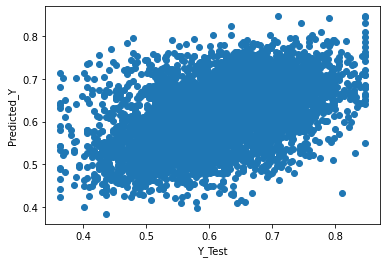

In [100]:
#checking the diff between actual and predicted value using graph
plt.scatter(x=test_y,y=pred)
plt.xlabel('Y_Test')
plt.ylabel('Predicted_Y')

# Observation:
As above graph shown that it is predicting near to tha actual value and RMSE error is very less

In [101]:
#importing library for classification prediction
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [102]:
#assign the value of x and y for training and testing phase
x_c = df.drop(columns=['region','Date'])
y_c = df[["region"]]
print(x_c.shape)
print(y_c.shape)

(18249, 13)
(18249, 1)


In [103]:
#Standardize the value of x so that mean will 0 and SD will become 1 , and make the data as normal distributed
sc = StandardScaler()
sc.fit_transform(x_c)
x_c = pd.DataFrame(x_c,columns=x_c.columns)

# now we are taking region as output variable and try to prediction using classification method

In [104]:
#Now by using multiple Algorithms we are calculating the best Algo which suit best for our data set 

model = [DecisionTreeClassifier(),KNeighborsClassifier()]
max_accuracy_score = 0
for r_state in range(40,90):
    train_xc,test_xc,train_yc,test_yc = train_test_split(x_c,y_c,random_state = r_state,test_size = 0.33)
    for i_c in model:
        i_c.fit(train_xc,train_yc)
        pre_c = i_c.predict(test_xc)
        ac_score = accuracy_score(test_yc,pre_c)
        print("accuracy score correspond to random state " ,r_state ,"is", ac_score)
        if ac_score> max_accuracy_score:
            max_accuracy_score=ac_score
            final_state = r_state
            final_model = i_c
            
print()
print()
print()
print()

print("max accuracy score correspond to random state " ,final_state , "is" , max_accuracy_score ,"and model is",final_model)

accuracy score correspond to random state  40 is 0.771210360285572
accuracy score correspond to random state  40 is 0.25884110908185287
accuracy score correspond to random state  41 is 0.7730366926780674
accuracy score correspond to random state  41 is 0.26398804582434005
accuracy score correspond to random state  42 is 0.7826664452930433
accuracy score correspond to random state  42 is 0.27145940561182136
accuracy score correspond to random state  43 is 0.7785156898555537
accuracy score correspond to random state  43 is 0.2621617134318446
accuracy score correspond to random state  44 is 0.77204051137307
accuracy score correspond to random state  44 is 0.2578449277768554
accuracy score correspond to random state  45 is 0.7886435331230284
accuracy score correspond to random state  45 is 0.2605014112568487
accuracy score correspond to random state  46 is 0.7821683546405446
accuracy score correspond to random state  46 is 0.26166362277934585
accuracy score correspond to random state  47 i

In [105]:
#Checking the best parameter for prediction of KNeighborsClassifier Algo using GridSearchCV
train_xc,test_xc,train_yc,test_yc = train_test_split(x_c,y_c,random_state = 76,test_size = 0.33)
KNC = KNeighborsClassifier()
parameters={'n_neighbors' : range(1,30)}
gridsearch=GridSearchCV(KNC,parameters)
gridsearch.fit(train_xc,train_yc)
gridsearch.best_params_

{'n_neighbors': 1}

In [106]:
KNC = KNeighborsClassifier(n_neighbors=1)
KNC.fit(train_xc,train_yc)
predc = KNC.predict(test_xc)
acu_score = accuracy_score(test_yc,predc)
print("Accuracy Score :",acu_score*100)

Accuracy Score : 26.000332060435


In [107]:
#Calculating the scores of different parameters
score = cross_val_score(KNC,x_c,y_c,cv = 100,scoring='accuracy').mean()
print('Cross_val_score : ', score*100)
print('Mean Score      : ' , score.mean()*100)
print('STD score       : ' , score.std())

Cross_val_score :  26.646099801837508
Mean Score      :  26.646099801837508
STD score       :  0.0


In [108]:
pred_prob = KNC.predict_proba(test_xc)[:,1]
pred_prob

array([0., 0., 0., ..., 0., 0., 0.])

In [109]:

fpr,tpr,thresholds = roc_curve(test_yc,pred_prob,pos_label=True)

In [110]:
print(fpr)
print("\n")
print(tpr)
print("\n")
print(thresholds)

[0.         0.01759134 1.        ]


[0.         0.10810811 1.        ]


[2. 1. 0.]


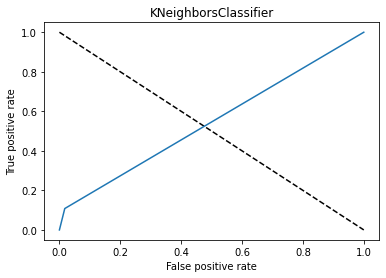

In [111]:
#Plotting the graph which tells us about the area under curve , more the area under curve more will be the better prediction

plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label = 'KNeighborsClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('KNeighborsClassifier')
plt.show()

# Observation:
As from this data set we have following conclusion: - taking price as y variable is predicting well for this model as comapared to region - also r2 score value is also greater then accuracy score

In [ ]:
#save the model 
joblib.dump(KNN, 'Project_8.obj')

# Conclusions
- With the help of notebook I learnt how EDA can be carried out using Pandas and other plotting libraries.
- Also I have seen making use of packages like matplotlib, plotly and seaborn to develop better insights about the data.
- I have also seen how preproceesing helps in dealing with missing values and irregualities present in the data. I also learnt how to create new features which will in turn help us to better predict the survival.
- I also make use of pandas profiling feature to generate an html report containing all the information of the various features present in the dataset.
- I have seen the impact of columns like type, year/date on the Average price increase/decrease rate.
The most important inference drawn from all this analysis is, I get to know what are the features on which price is highly positively and negatively coorelated with.
- I came to know through analysis which model will be work with better accuracy with the help of low residual and RMSE scores.
- This project helped me to gain insights and how I should go with flow, which model to choose first and go step by step to attain results with good accuracy. Also get to know where to use Linear, Decision Tree and other applicable and required models to fine tune the predictions.